# Métricas

In [ ]:
import pandas as pd # type: ignore

# Carga el dataset
ruta_archivo = '/content/drive/MyDrive/Colab Notebooks/Data/student_depression_dataset.csv'  # Reemplaza con tu ruta
df = pd.read_csv(ruta_archivo)

# Muestra las primeras filas y la forma del dataset
display(df.head())
print(df.shape)

# Explora la estructura del dataset, valores faltantes y distribución de variables clave
df.info()
print(df.describe())
print("\nValores nulos en el DataFrame:")
print(df.isnull().sum())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


(27901, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  obj

In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.impute import SimpleImputer # Import SimpleImputer here
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder




categorical_cols = ['Gender', 'City', 'Profession', 'Dietary Habits','Sleep Duration', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']
for col in categorical_cols:
    print(f"\nUnique values for {col}:")
    print(df[col].value_counts())

# Convert 'Sleep Duration' to numerical, handling 'Less than 5', 'More than 8', and 'Others'
df['Sleep Duration'] = df['Sleep Duration'].astype(str).str.split('-').str[0]
df['Sleep Duration'] = df['Sleep Duration'].str.replace("'", '').str.replace(' hours', '')
df['Sleep Duration'] = df['Sleep Duration'].replace(['Less than 5', 'More than 8', 'Others'], [4, 9, df['Sleep Duration'].replace(['Less than 5', 'More than 8', 'Others'], [4, 9, np.nan]).astype(float).median()]).astype(float)



# Convert 'Financial Stress' to numerical
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')

# Identify categorical and numerical columns
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress']

# Create transformers
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Apply transformations to the DataFrame
df_C = preprocessor.fit_transform(df)

# Get feature names after one-hot encoding
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Create a new DataFrame with processed data and feature names
df_C = pd.DataFrame(df_C.toarray(), columns=feature_names)




display(df_C.head())
# Convertir variables categóricas a numéricas usando one-hot encoding
#df_C = pd.get_dummies(df, columns=['Gender','City','Profession','Sleep Duration', 'Dietary Habits', 'Degree','Have you ever had suicidal thoughts ?', 'Family History of Mental Illness'], drop_first=True)




# Dividir el dataset en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X = df_C
y = df['Depression']



display(X.head())
display(y)

# separacion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nValores nulos en el DataFrame:")
print(df.isnull().sum())
print(X_test.isnull().sum())


# Impute NaN values using the mean strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)






Unique values for Gender:


NameError: name 'df' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train_imputed, y_train)




# Crear y entrenar el modelo de SVM
#model = SVC(kernel='rbf', C=1, gamma='scale')  # Puedes probar otros kernels como 'rbf', 'poly', etc.
#model.fit(X_train_imputed, y_train)



LogisticRegression(max_iter=1000)

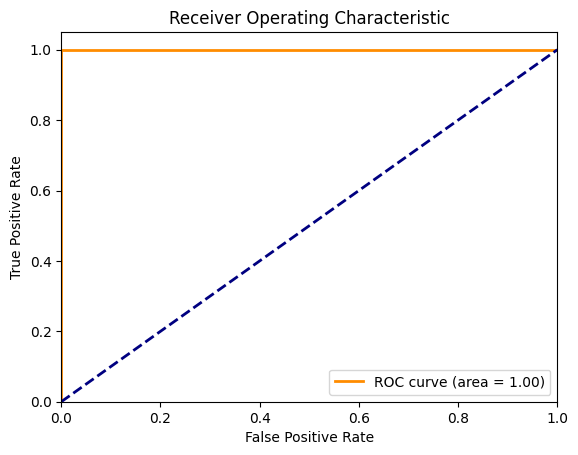

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_imputed)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # Assuming y_test and y_pred are binary labels
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

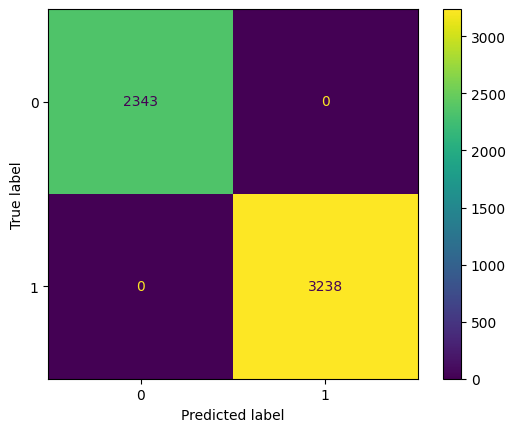

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()